# Fundamentals of Data Analysis - Project

**Author: Cecilia Pastore**

---

<details>
    <summary> Project assignement </summary>

>1. Analyse CO2 vs Temperature Anomaly from 800kyrs – present.
>2. Examine one other (paleo/modern) features (e.g. CH4 or polar ice-coverage)
>3. Examine Irish context:
>    o Climate change signals: (see Maynooth study: The emergence of a climate change signal in long-term Irish >meteorological observations - ScienceDirect)
>4. Fuse and analyse data from various data sources and format fused data set as a pandas dataframe and export to csv and json formats
>5. For all of the above variables, analyse the data, the trends and the relationships between them (temporal leads/lags/>frequency analysis).
>6. Predict global temperature anomaly over next few decades (synthesise data) and compare to published climate models if >atmospheric CO2 trends continue
>7. Comment on accelerated warming based on very latest features (e.g. temperature/polar-icecoverage)
>
>Use a Jupyter notebook for your analysis and track your progress using GitHub.
>
>Use an academic referencing style


## 1. Import the needed libraries for the project

As first, we will need to import all the libraries that will be needed for the dataaset. 

Here the libraries imported:

- [pandas (pd)[]](https://pandas.pydata.org/): Data manipulation and analysis library. Provides data structures like DataFrame and Series for efficient data handling.
- [seaborn (sns)[]](https://seaborn.pydata.org/): Statistical data visualization library. Enhances Matplotlib visualizations with appealing styles and themes.
- [matplotlib.pyplot (plt)[]](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html): Plotting library for creating static, interactive, and animated visualizations. Offers a wide range of plot types and customization options.
- [numpy (np)[]](): Numerical computing library for large, multi-dimensional arrays and matrices. Supports mathematical functions for array operations.
- [datetime (dt)[]](https://docs.python.org/3/library/datetime.html): Module for working with dates and times. Provides classes for representing and manipulating dates and times.
- [scikit-learn (from sklearn)[]](https://scikit-learn.org/):  Machine learning library. Provides tools for data analysis, modeling, and machine learning algorithms.
- [LinearRegression (from sklearn.linear_model)[]](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html): Linear regression model implementation in scikit-learn. Fits a linear model to the training data and makes predictions.
- [train_test_split (from sklearn.model_selection)[]](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html): Function for splitting datasets into training and testing sets.
- [metrics (from sklearn)[]](https://scikit-learn.org/stable/modules/model_evaluation.html): Module containing various metrics for evaluating model performance.

In [980]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn import metrics

## 2. CO2 

The purpose of this section is to compile a dataset spanning 800,000 years ago to the present, illustrating the levels of carbon dioxide per million by volume (p.p.m.v.) throughout this historical era.

### 2.1 CO2 - Bereiter et al. (2014)

The initial dataset, provided by the lecture, it derive from [Bereiter et al. (2014), Revision of the EPICA Dome C CO2 record from 800 to 600 kyr before present, Geophysical Research Letters, doi: 10.1002/2014GL061957.[]](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2014GL061957).

This dataset is a revised version of the EPICA Dome C CO2 record covering the period from 800 to 600 thousand years before the present  (that will be presented further in the project). It offers insights into the composition of the atmosphere during the ancient era, ranging from 800,000 years ago until more precise measurement data became available. The dataset derives CO2 concentrations trapped in ice cores from Antarctica. As a revision of the EPICA Dome C CO2 dataset, it reassesses the oldest segment of the EDC CO2 record using distinct air extraction methods and sections of the core.


The dataset chronologies is expressed in **ECD3** before present year where present year, for the dataset, is 1950 [[]](https://cp.copernicus.org/articles/3/485/2007/cp-3-485-2007.pdf). 

First we are gonna to import the dataset. The dataset has been provided by the lecture and saved in the subfolder data **grl52461-sup-0003-supplementary** and, for the porpuse of this project, will be called **Bereiter**.

The dataset will be importer as a pandas dataframe using [.read_exceel[]](https://sparkbyexamples.com/pandas/pandas-read-excel-multiple-sheets-in-pandas/) from the sheet **CO2 Composite**. Further on, the dataset format is fixed selecting the relevant data, resetting the index [[]](https://datagy.io/pandas-drop-index-column/), assign column name [[]](https://saturncloud.io/blog/how-to-set-column-headers-to-the-first-row-in-a-pandas-dataframe-a-comprehensive-guide/) and removing the first empty row.

In [981]:
# Read data from Bereiter dataset
# Source: https://sparkbyexamples.com/pandas/pandas-read-excel-multiple-sheets-in-pandas/
bereiter_df = pd.read_excel('data\co2\grl52461-sup-0003-supplementary.xls', sheet_name='CO2 Composite')

# Create a subset of the DataFrame (selecting all rows starting from the 14th row and all columns)
# Source: https://datagy.io/pandas-drop-index-column/
ber_df = bereiter_df.iloc[13:]

# Reset the index and drop the previous index column
ber_df = ber_df.reset_index(drop=True)

# Use the first row as headers
# Source: https://saturncloud.io/blog/how-to-set-column-headers-to-the-first-row-in-a-pandas-dataframe-a-comprehensive-guide/
ber_df.columns = ber_df.iloc[0]

# Drop the first row (header row)
ber_df = ber_df.iloc[1:]


The dataset's datatype has been standardized to float to preempt potential issues [[]](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html). Additionally, leading and trailing spaces in column names have been removed for consistency

In [982]:
# Change the datatype to float64 for the entire DataFrame
# Reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html
ber_df = ber_df.astype('float64')

# Remove leading and trailing spaces from column names for better consistency
ber_df.columns = ber_df.columns.str.strip()

Now, for clarity, we will create a new column representing the year in the standard format. Additionally, we will adjust the ECD3 chronologies (contained in the 'Gasage (yr BP)' column) to show the present year instead of 1950.

To achieve this, I have utilized the [.today()[]](https://www.askpython.com/python/examples/obtain-current-year-and-month) function from the datetime module.

In [983]:
# Add a new column "Year" to represent the year in the standard date format.
# Define the current year using the date module.
current_year = dt.date.today().year

# Calculate the actual year based on the 'Gasage (yr BP)' column, assuming the present is 1950.
ber_df['Year'] = 1950 - ber_df['Gasage (yr BP)'].astype(int)

# Adjust the 'Gasage (yr BP)' column to express dates as of the current year.
ber_df['ECD3_bp'] = current_year - 1950 + ber_df['Gasage (yr BP)']

# Drop the 'Gasage (yr BP)' column for clarity, as it is no longer needed.
ber_df = ber_df.drop('Gasage (yr BP)', axis=1)

I [reordered[]](https://practicaldatascience.co.uk/data-science/how-to-reorder-pandas-dataframe-columns) and [sort[]](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html) the columns for clarity. Then [duplicate value[]](https://www.statology.org/pandas-find-duplicates/) in the column ECD3_bp are check with no result.

In [984]:
# Reorder columns and rows based on the 'Year' column
# Reference: https://practicaldatascience.co.uk/data-science/how-to-reorder-pandas-dataframe-columns
ber_df = ber_df.reindex(columns=['Year', 'ECD3_bp', 'CO2 (ppmv)', 'sigma mean CO2 (ppmv)'])

# Sort the DataFrame based on the 'Year' column in descending order
# Reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html
ber_df = ber_df.sort_values(by='Year', ascending=False)

# Check for duplicates in the 'ECD3_bp' column
# Reference: https://www.statology.org/pandas-find-duplicates/
duplicate_in_year = ber_df.duplicated(['ECD3_bp'], keep=False)
print(ber_df[duplicate_in_year])

Empty DataFrame
Columns: [Year, ECD3_bp, CO2 (ppmv), sigma mean CO2 (ppmv)]
Index: []


[Missing values[]](https://medium.com/analytics-vidhya/python-finding-missing-values-in-a-data-frame-3030aaf0e4fd) and the [data shape[]](https://stackoverflow.com/questions/58008120/how-to-use-format-in-python-to-print-out-the-data-shape) are printed. The dataframe shows no missing values, indicating consistency, and it is composed of 1904 rows and 4 columns.

In [985]:
# Check for missing values in the dataset
# Reference: https://medium.com/analytics-vidhya/python-finding-missing-values-in-a-data-frame-3030aaf0e4fd
print("Missing Values:")
print(ber_df.isnull().sum(), "\n")

# Check the shape of the dataset
# Reference: https://stackoverflow.com/questions/58008120/how-to-use-format-in-python-to-print-out-the-data-shape
print("Dataset Shape:")
print(f'Rows: {ber_df.shape[0]}, Columns: {ber_df.shape[1]}')


Missing Values:
0
Year                     0
ECD3_bp                  0
CO2 (ppmv)               0
sigma mean CO2 (ppmv)    0
dtype: int64 

Dataset Shape:
Rows: 1901, Columns: 4


We can now visualize the data plotting the CO2 concentration against the ECD3 age. For the porpuse i have used the function [.lineplot[]](https://seaborn.pydata.org/generated/seaborn.lineplot.html) from the seaborn library. As a first observation, we can discern a series of cycles indicating fluctuations in CO2 concentration, with a notable acceleration in recent years.

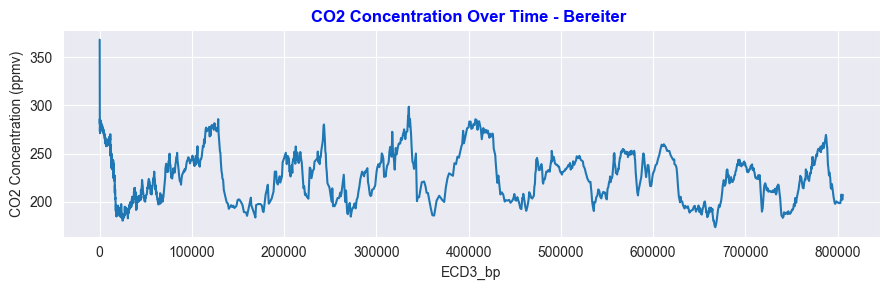

In [986]:
# Plotting CO2 concentration against ECD3_bp

# Set the visual style
sns.set_style("darkgrid")

# Set the figure size
plt.figure(figsize=(9, 3))

# Create a line plot
sns.lineplot(x='ECD3_bp', y='CO2 (ppmv)', data=ber_df)

# Add labels and title
plt.xlabel('ECD3_bp')
plt.ylabel('CO2 Concentration (ppmv)')
plt.title('CO2 Concentration Over Time - Bereiter ', fontweight='bold', color='blue')

# Improve spacing for better aesthetics
plt.tight_layout()

# Display the plot
plt.show()


### 2.2 CO2 - Luthi et al (2008)

The second dataset has been provided from [Luthi et al (2008) - nature publicathions[a]](https://www.nature.com/articles/nature06949). This dataset is the original version of the previous presented dataset, after revised by: [Bereiter et al. (2014), Revision of the EPICA Dome C CO2 record from 800 to 600 kyr before present, Geophysical Research Letters, doi: 10.1002/2014GL061957.[]](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2014GL061957)

As the previous one, the dataset comprehensively spans from 800,000 years before the present era to the modern era, marked by more precise routine atmospheric measurements. As the previous dataset he analysis involved measuring the composition of air trapped in Antarctic ice cores.

The dataset chronologies is again expressed in **ECD3** before present year where present year, for the dataset, is 1950 [[a]](https://cp.copernicus.org/articles/3/485/2007/cp-3-485-2007.pdf). 

First we are gonna to import the dataset. The dataset has been provided by the lecture and saved in the subfolder data **41586_2008_BFnature06949_MOESM31_ESM** and, for the porpuse of this project, will be called IPCC.

in the same way that the previous datset we will perfom the following modification:
1. Imports the dataset from an Excel format.
2. Selects the relevant data.
3. Defines column names.
4. Drops irrelevant rows.
5. Sets data types to float to prevent potential issues.
6. Cleans and trims the columns.
7. Creates a new column expressing age in the common year format for clarity.
8. Adjusts the 'ECD3' chronologies, considering years before the present as the current year.
9. Sorts the columns.

In [987]:
# Read data from the IPCC dataset
ipcc_data_co2 = pd.read_excel('data/co2/41586_2008_BFnature06949_MOESM31_ESM.xls', sheet_name='3.  Composite CO2')

# Create a subset of the DataFrame (excluding metadata rows)
ipcc_df_co2 = ipcc_data_co2.iloc[5:]

# Reset the index for a clean start
ipcc_df_co2 = ipcc_df_co2.reset_index(drop=True)

# Use the first row as headers
ipcc_df_co2.columns = ipcc_df_co2.iloc[0]

# Drop the first row (header row)
ipcc_df_co2 = ipcc_df_co2.iloc[1:]

# Change the datatype to float64 for numerical columns
ipcc_df_co2 = ipcc_df_co2.astype('float64')

# Remove leading and trailing spaces from column names
ipcc_df_co2.columns = ipcc_df_co2.columns.str.strip()

# Define the current year
current_year = datetime.date.today().year

# Add a new column "Year" showing the current year based on 'EDC3_gas_a (yr)'
ipcc_df_co2['Year'] = 1950 - ipcc_df_co2['EDC3_gas_a (yr)'].astype(int)

# Fix the 'EDC3_gas_a (yr)' column to express the present as 2023
ipcc_df_co2['EDC3_bp'] = current_year - 1950 + ipcc_df_co2['EDC3_gas_a (yr)']

# Reorder columns with 'Year' as the first column
first_column = ipcc_df_co2.pop('Year') 
ipcc_df_co2.insert(0, 'Year', first_column) 

# Sort the DataFrame based on the 'Year' column in descending order
ipcc_df_co2 = ipcc_df_co2.sort_values(by='Year', ascending=False)

After double checking the duplicate data we can see there are two rows duplicate for the columns EDC3_bp. The duplicate value hare handle averaging the co2 values. 

In [988]:
# check for duplicate in the columns EDC3_bp
duplicate_in_year = ipcc_df_co2.duplicated(['EDC3_bp'], keep=False)
print("Duplicate Value")
print(ipcc_df_co2[duplicate_in_year])

# Group by 'Year' and 'EDC3_bp', then average 'CO2 (ppmv)' to eliminate duplicates
# Note: Line 532 and 531 are duplicate and are combined here to avoid redundancy
ipcc_df_co2 = (
    ipcc_df_co2
    .groupby(['Year', 'EDC3_bp'])['CO2 (ppmv)']
    .mean()
    .reset_index()
    .sort_values(by='Year', ascending=False)
)

Duplicate Value
0      Year  EDC3_gas_a (yr)  CO2 (ppmv)   EDC3_bp
532 -407433         409383.0       274.2  409457.0
531 -407433         409383.0       275.2  409457.0


The index is reset, for better clarity, and missing value are check. the dataset deosn't show missing value. the shape of the dataset is 1095 rows and 3 columns showing less observation than the previous dataset. 

In [989]:
# Resetting the index for a clean start
ipcc_df_co2 = ipcc_df_co2.reset_index(drop=True)

# Checking for missing values
print("Missing Values:")
print(ipcc_df_co2.isnull().sum(), "\n")

# Checking the data shape
print("Dataset Shape:")
print(f'Rows: {ipcc_df_co2.shape[0]}, Columns: {ipcc_df_co2.shape[1]}')

Missing Values:
Year          0
EDC3_bp       0
CO2 (ppmv)    0
dtype: int64 

Dataset Shape:
Rows: 1095, Columns: 3


Finally we can plot the dataframe. from a first view it look to me showing the same trend of the previous one with period cicle and an acceleration on present time.

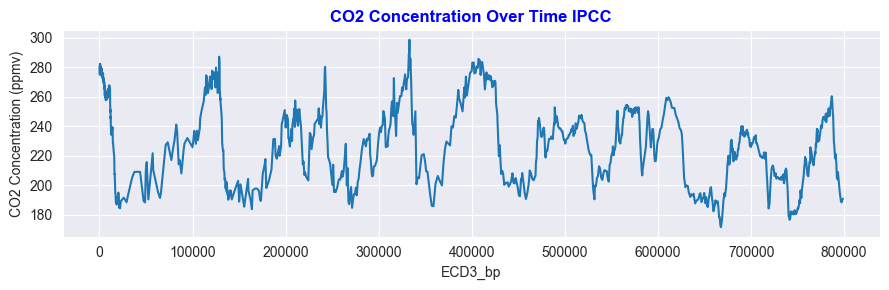

In [990]:
# Plotting CO2 concentration against ECD3_bp

# Set the visual style
sns.set_style("darkgrid")

# Set the figure size
plt.figure(figsize=(9, 3))

# Create a line plot
sns.lineplot(x='EDC3_bp', y='CO2 (ppmv)', data=ipcc_df_co2)

# Add labels and title
plt.xlabel('ECD3_bp')
plt.ylabel('CO2 Concentration (ppmv)')
plt.title('CO2 Concentration Over Time IPCC', fontweight='bold', color='blue')

# Improve spacing for better aesthetics
plt.tight_layout()

# Display the plot
plt.show()

## 2.3 Comparing the datasets

We can now compare the datasets to choose which one is better suited for constructing the main dataset for CO2 concentration from 800,000 years ago to the modern era. The best way to do that is to plot them together.

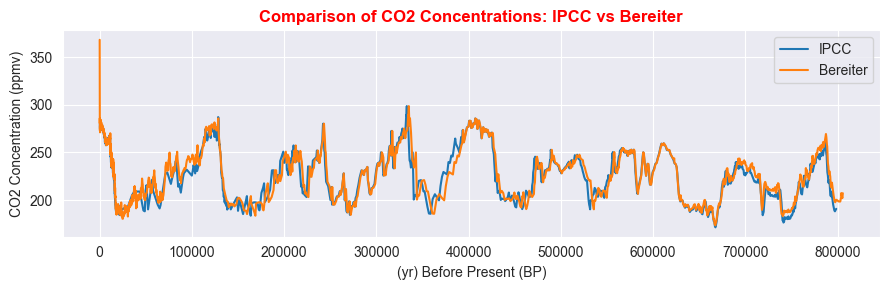

In [991]:
# Set the size of the figure
plt.figure(figsize=(9, 3))

# Create a line plot for IPCC data
sns.lineplot(x='EDC3_bp', y='CO2 (ppmv)', data=ipcc_df_co2, label='IPCC')

# Create a line plot for Bereiter data
sns.lineplot(x='ECD3_bp', y='CO2 (ppmv)', data=ber_df, label='Bereiter')

# Add labels and title
plt.xlabel('(yr) Before Present (BP)')
plt.ylabel('CO2 Concentration (ppmv)')
plt.title('Comparison of CO2 Concentrations: IPCC vs Bereiter', fontweight='bold', color='red')

# Add legend
plt.legend()

# Improve spacing for better aesthetics
plt.tight_layout()

# Show the plot
plt.show()

From the above, the two datasets look quite similar. This was expected since one of them is derived from the other with revised measurement methodologies. For the purpose of the analysis, I will choose the Bereiter dataset as it contains more observations and is a more recent revision of the other dataset, claiming to be more precise.

But first i will prepare the Bereiter to the fusion removing not needed columns.

In [992]:
# remove last columng of the Bereiter dataser and rename the dataset
co2_df = ber_df.iloc[:, 0:3]

## 2.3 Fusing the dataset on modern era and export on CSV/JASON

The previously examined dataset (Bereiter) has observations until 2001. We need to address the missing years. Following the advice from the lecture, given the challenge of finding directly comparable data, we can utilize global measurements that are not perfectly associated with Antarctica.

As a solution, I have decided to use a modern dataset representing the global mean concentration of CO2. I will calculate the percentage of increase/decrease between consecutive years in this global dataset. Subsequently, I will apply these percentages to the missing years in the Bereiter dataset to simulate CO2 concentrations.

The recent observation are contained in dataset called **co2_annmean_mlo** provided by [NOAA GML DATA []](https://www.noaa.gov/). The dataset show global co2 concentration from the 1959 to 2022.

We will first import the dataset and perform the necessary manipulations to calculate the percentage increase/decrease of values from the previous year for the years 2002 to 2022

In [993]:
# Import global CO2 mean rates in the modern era
# Data has been downloaded from the website https://gml.noaa.gov/ccgg/trends/gl_data.html and added as a CSV in the repository
global_co2_moana = pd.read_csv('data\co2\co2_annmean_mlo.csv')

# Remove unnecessary columns
global_co2_moana = global_co2_moana.iloc[:, 0:2]

# Reset the index for a clean start
global_co2_moana = global_co2_moana.reset_index(drop=True)

# Keep only rows with values from 1954 onwards
global_co2_moana = global_co2_moana.iloc[43:, :]

# Reset the index columns
global_co2_moana = global_co2_moana.reset_index(drop=True)

# Set up column names
global_co2_moana.columns = ["Year", "CO2 (ppm)"]

# Convert the 'CO2 (ppm)' column to 'float64'
global_co2_moana['CO2 (ppm)'] = global_co2_moana['CO2 (ppm)'].astype('float64')

# Convert the 'Year' column to 'int64'
global_co2_moana['Year'] = global_co2_moana['Year'].astype('int64')

# Create a lagged column 'co2_lag(1)' to store the CO2 concentration from the previous year
global_co2_moana['co2_lag(1)'] = global_co2_moana['CO2 (ppm)'].shift(1)

Now the % of increase/decrease of each year compared to the previous one is calculate and added in a [new column[]](https://vitalflux.com/pandas-dataframe-how-to-add-rows-columns/).

In [994]:
# calculate increase percentage of co2 for modern era in the moana dataset 

# define current year and last year variable 
current_year_co2 = global_co2_moana['CO2 (ppm)']
previous_year_co2 = global_co2_moana['co2_lag(1)']

# create increase column    
global_co2_moana['%_increase'] = (current_year_co2-previous_year_co2) / previous_year_co2

Finally, the following effectively extends the DataFrame co2_df by adding rows for the years 2002 to 2022 based on the percentage increase in CO2 concentration obtained from the global dataset. The dataset is then sorted for clarity.

In [995]:
# Define the current year using the datetime module
current_year = dt.date.today().year

# Loop through the years from 2002 to 2022
for i in range(2002, 2023):
    # Calculate the 'ECD3_bp' (age in years before present) for the current year
    y = current_year - i
    # Calculate the previous year
    x = i - 1
    # Retrieve the CO2 concentration for the previous year from the existing DataFrame 'co2_df'
    previous_year = co2_df.loc[co2_df["Year"] == x, 'CO2 (ppmv)']
    # Retrieve the percentage increase in CO2 concentration for the current year from the global dataset
    increase = global_co2_moana.loc[global_co2_moana["Year"] == i, "%_increase"].values[0]
    # Calculate the CO2 concentration for the current year based on the percentage increase
    co2 = previous_year * (1 + increase)
    # Create a new row as a DataFrame
    new_row = pd.DataFrame({'Year': i, 'ECD3_bp': y, 'CO2 (ppmv)': co2})
    # Concatenate the new row with the existing DataFrame 'co2_df'
    co2_df = pd.concat([co2_df, new_row], ignore_index=True)
    
# sort by year and reset index 
co2_df = co2_df.sort_values(by='Year', ascending=False).reset_index(drop=True)

The dataset is exported as a [CSV []](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html) and [Jason []](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_json.html) and placed in the folder export/co2-temp-ch4 folder. 

In [1045]:
# Export to CSV
co2_df.to_csv('export\co2-temp-ch4\co2_dataset.csv', index=False)

# Export to JSON
co2_df.to_json('export\co2-temp-ch4\co2_dataset.json', orient='records')

In [998]:
# from text to csv - temperature 
# https://www.geeksforgeeks.org/convert-text-file-to-csv-using-python-pandas/
# https://stackoverflow.com/questions/19632075/how-to-read-file-with-space-separated-values-in-pandas

noaa_temperature = pd.read_csv("data\Temperature\edc3deuttemp2007.txt", skiprows=91, sep='\s+')


# remve columns not needed from the df for better clarity 
# https://www.statology.org/pandas-keep-columns/
noaa_temperature = noaa_temperature[['Age','Temperature']]

# rename columns for clarity 
columns_to_rename = ['ECD3_age', 'temp_anomality']
noaa_temperature.columns = columns_to_rename



In [999]:
# Checking missing values
# https://medium.com/analytics-vidhya/python-finding-missing-values-in-a-data-frame-3030aaf0e4fd
print("Missing Values")
print(noaa_temperature.isnull().sum(), "\n")

# Checking data shape
# https://stackoverflow.com/questions/58008120/how-to-use-format-in-python-to-print-out-the-data-shape
print("Dataset Shape:")
print(f'Rows {noaa_temperature.shape[0]}, Columns: {noaa_temperature.shape[1]}')

Missing Values
ECD3_age           0
temp_anomality    15
dtype: int64 

Dataset Shape:
Rows 5800, Columns: 2


In [1000]:
# drop row with null value 
# https://www.digitalocean.com/community/tutorials/pandas-dropna-drop-null-na-values-from-dataframe
noaa_temperature = noaa_temperature.dropna()

In [1001]:
# check for duplicate in the columns Gasage (yr BP)
# https://www.statology.org/pandas-find-duplicates/
duplicate_in_year = noaa_temperature.duplicated(['ECD3_age'], keep=False)
print("Duplicate Value")
print(noaa_temperature[duplicate_in_year])

Duplicate Value
Empty DataFrame
Columns: [ECD3_age, temp_anomality]
Index: []


In [1002]:
# define the current year
current_year = datetime.date.today().year
# add columng age based on year before present equal to 2023 
noaa_temperature['ECD3_bp'] =  current_year - 1950 + noaa_temperature['ECD3_age']
# add a column 'year' to show the year refear about 
noaa_temperature['Year'] = (current_year - (noaa_temperature['ECD3_bp'])).astype(int)
# drop column ECD3_age as redundant 
noaa_temperature = noaa_temperature.drop(columns='ECD3_age')
# reorder columns in the df 
# https://sparkbyexamples.com/pandas/pandas-change-the-order-of-columns/
noaa_temperature = noaa_temperature[['Year','ECD3_bp','temp_anomality']]


In [1003]:
# import jouzel data 
jouzel_temperature = pd.read_excel('data\Temperature\epicaDC.deuttemp.EDC3-AICC (3).xls', 
                                   sheet_name='epicaDC.deuttemp.EDC3-AICC.txt')

In [1004]:
# keep only relevant columng indicating the age and the temperature 
jouzel_temperature = jouzel_temperature[['EDC3béta','temp']]

# check for duplicate in the columns Gasage (yr BP)
# https://www.statology.org/pandas-find-duplicates/
duplicate_in_year = jouzel_temperature.duplicated(['EDC3béta'], keep=False)
print("Duplicate Value")
print(jouzel_temperature[duplicate_in_year])


Duplicate Value
Empty DataFrame
Columns: [EDC3béta, temp]
Index: []


In [1005]:
# Checking missing values
# https://medium.com/analytics-vidhya/python-finding-missing-values-in-a-data-frame-3030aaf0e4fd
print("Missing Values")
print(jouzel_temperature.isnull().sum(), "\n")

# Checking data shape
# https://stackoverflow.com/questions/58008120/how-to-use-format-in-python-to-print-out-the-data-shape
print("Dataset Shape:")
print(f'Rows {jouzel_temperature.shape[0]}, Columns: {jouzel_temperature.shape[1]}')

Missing Values
EDC3béta    0
temp        0
dtype: int64 

Dataset Shape:
Rows 5819, Columns: 2


In [1006]:
# add a column taking as a year before present the the current year 
jouzel_temperature['ECD3_bp'] =  current_year - 1950 + jouzel_temperature['EDC3béta']
# add a column 'year' to show the year refear about 
jouzel_temperature['Year'] = (current_year - (jouzel_temperature['ECD3_bp'])).astype(int)
# change the temperature column from kelvin to celsiu
jouzel_temperature['temp'] = jouzel_temperature['temp'] - 273.15


In [1007]:
# drop column ECD3beta as redundant 
jouzel_temperature = jouzel_temperature.drop(columns='EDC3béta')
# reorder columns in the df 
# https://sparkbyexamples.com/pandas/pandas-change-the-order-of-columns/
jouzel_temperature = jouzel_temperature[['Year','ECD3_bp','temp']]

In [1008]:
jouzel_temperature

,Year,ECD3_bp,temp
0,2000,24.00000,-54.85
1,1993,30.44023,-54.85
2,1987,36.55981,-54.85
3,1981,42.35844,-54.85
4,1974,49.44722,-54.85
...,...,...,...
5814,-814921,816945.60000,-62.15
5815,-815743,817767.60000,-61.95
5816,-816555,818579.50000,-61.85
5817,-817353,819377.10000,-61.75


For the present year I find multiple dataset online that show temperature anomalities for the current era, but all of them take as mean for calculate the anomality a different time frame from 1951  to 1980. Example are [here []](https://www.temperaturerecord.org/#sources)) and [here []](https://berkeleyearth.org/temperature-region/antarctica) This will calculate a discrepency.

The only dataset i was able to find was sourced [here []](https://en.tutiempo.net/climate/ws-898280.html) and are observation taken on the artatica station DOME C II The location of the station is not exactly the same of the EPICA DOME C, who the above data refer, and this can create discrepancy. However this is the only dataset i was able to find showing average per year that i can use to calculate the temporature anomalyties and should not be very distant as per the [antartic stations avaiable []](https://en.wikipedia.org/wiki/Research_stations_in_Antarctica#:~:text=The%20United%20States%20maintains%20the%20southernmost%20base%2C%20Amundsen%E2%80%93Scott,Vostok%20Station%20at%2078%C2%B027%E2%80%B250%E2%80%B3S%20during%20the%20winter%20season.).

As the overallapping years doesn't match the temperature, I decide to calculate the % of increase and apply it to the dataset to obtein the "estimated temperature".

In [1009]:
# create a dataset with the data from the 2000 to the 2022 from the website 
# https://en.tutiempo.net/climate/ws-898280.html

# Assuming 'temp_until_2022' is your dictionary
temp_until_2022 = {
    'Year': [2000, 2001, 2003, 2004, 2010, 2011, 2012, 2013, 2014, 2017, 2018, 2019, 2020, 2022],
    'temp': [-51.1, -50.9, -51.9, -50.4, -52.6, -50.2, -51.8, -50.9, -51.3, -51.3, -51.1, -50.2, -50.3, -49.9]
}

# Create a DataFrame from the dictionary
temp_until_2022_df = pd.DataFrame(temp_until_2022)

# define current year
current_year = datetime.date.today().year

# create the column ECD3_bp referring to the year before the present
temp_until_2022_df['ECD3_bp'] = current_year - temp_until_2022_df['Year']

# add log1 column for the temp
temp_until_2022_df['log1_temp'] = temp_until_2022_df['temp'].shift(1)

# create the '%_increase' column
temp_until_2022_df['%_increase'] = (temp_until_2022_df['temp'] - temp_until_2022_df['log1_temp']) / temp_until_2022_df['log1_temp']

# Display the resulting DataFrame
temp_until_2022_df



,Year,temp,ECD3_bp,log1_temp,%_increase
0,2000,-51.1,24,NaN,NaN
1,2001,-50.9,23,-51.1,-0.003914
2,2003,-51.9,21,-50.9,0.019646
3,2004,-50.4,20,-51.9,-0.028902
4,2010,-52.6,14,-50.4,0.043651
5,2011,-50.2,13,-52.6,-0.045627
6,2012,-51.8,12,-50.2,0.031873
7,2013,-50.9,11,-51.8,-0.017375
8,2014,-51.3,10,-50.9,0.007859
9,2017,-51.3,7,-51.3,-0.000000


In [1010]:
# list of the annual observation avaiable 
year_until_2022 = [2001, 2003, 2004, 2010, 2011, 2012, 2013, 2014, 2017, 2018, 2019, 2020, 2022]


for i in year_until_2022:
    y = 2024 - i
    x = temp_until_2022_df['Year'].shift(1).loc[temp_until_2022_df['Year'] == i].values[0]
    
    # Extract the previous year's temperature value
    previous_year_temp = jouzel_temperature.loc[jouzel_temperature["Year"] == x, 'temp'].values[0]
    
    # Extract the percentage increase from another DataFrame (global_co2_moana)
    increase = temp_until_2022_df.loc[temp_until_2022_df["Year"] == i, "%_increase"].values[0]
    
    # Calculate the new temperature value
    new_temp = previous_year_temp * (1 + increase)
    
    # Create a new row DataFrame
    new_row = pd.DataFrame({'Year': [i], 'ECD3_bp': [y], 'temp': [new_temp]})
    
    # Concatenate the new row to the existing DataFrame
    jouzel_temperature = pd.concat([jouzel_temperature, new_row], ignore_index=True)
    
# sort by year 
jouzel_temperature = jouzel_temperature.sort_values('Year', ascending=False).reset_index(drop=True)

In [1011]:
#calculate the temperature anomality 
# calculate the mean of aproximately the last 1000 year - not considerating the added lines
mean_jouzel = jouzel_temperature['temp'][12:226].mean()
#create a temp anomaly columng 
jouzel_temperature['temp_anomality'] = jouzel_temperature['temp'] - mean_jouzel

In [1012]:
jouzel_temperature

,Year,ECD3_bp,temp,temp_anomality
0,2022,2.0,-53.561937,2.209957
1,2020,4.0,-53.991292,1.780602
2,2019,5.0,-53.883953,1.887941
3,2018,6.0,-54.850000,0.921894
4,2017,7.0,-55.064677,0.707217
...,...,...,...,...
5827,-814921,816945.6,-62.150000,-6.378106
5828,-815743,817767.6,-61.950000,-6.178106
5829,-816555,818579.5,-61.850000,-6.078106
5830,-817353,819377.1,-61.750000,-5.978106


In [1013]:
jouzel_temperature.loc[jouzel_temperature['Year'] == 1911]
jouzel_temperature.to_csv('jousel_temperature.csv')

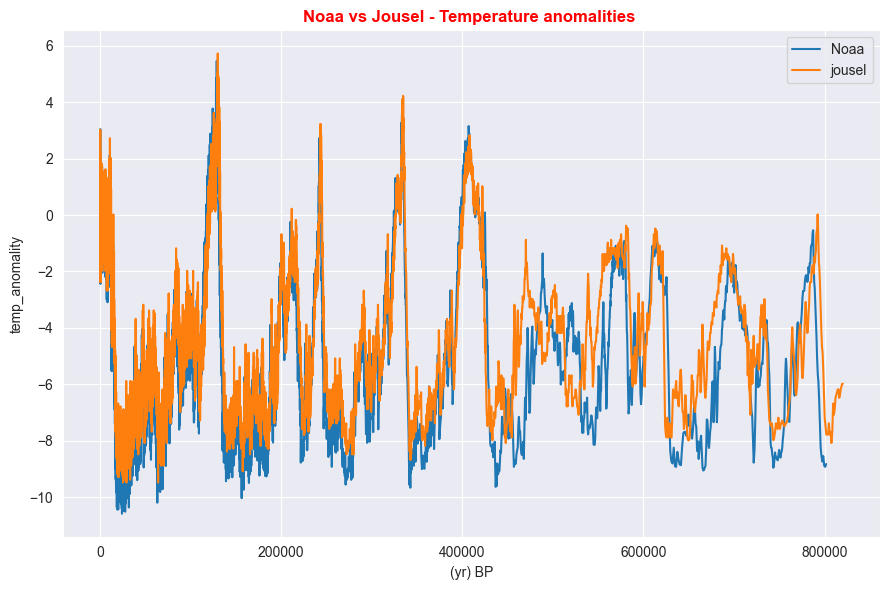

In [1014]:
# plot the 2 dataset toghethere to determinate what to use 

# Set the size of the figure
plt.figure(figsize=(9, 6))

# Create the line plot for noaa temp data
sns.lineplot(x='ECD3_bp', y='temp_anomality', data=noaa_temperature, label='Noaa')

# Create the line plot for Bereiter data
sns.lineplot(x='ECD3_bp', y='temp_anomality', data=jouzel_temperature, label='jousel')

# Add labels and title
plt.xlabel('(yr) BP')
plt.ylabel('temp_anomality')
plt.title('Noaa vs Jousel - Temperature anomalities ', fontweight='bold', color='red')

# Add legend
plt.legend()

# Improve spacing
plt.tight_layout()

# Show the plot
plt.show()

Examining the below graph, it look both the dataset are similar unit 40000 yearf before present and after they show some discrepancies. 

I assume the discrepancy is due to the difficult to have accurate observation for acient time. 

Both the dataset has similar size but the noa dataset has data until the 1911, in opposite with the Jouzel dataset that has data until the year 2000. As the size of the 2 similar, and considering the first 40000 years before present have similar result, I have decided to keep the noa dataset, that show the anomalities already calculated and, due to that, is more realible, and add the year from 1911 to 2000 of the Jozel dataset. 

In [1015]:
# define the jozel section to be appen 
jouzel_to_append = jouzel_temperature.loc[:11, ['Year', 'ECD3_bp', 'temp_anomality']]
jouzel_to_append

,Year,ECD3_bp,temp_anomality
0,2022,2.0,2.209957
1,2020,4.0,1.780602
2,2019,5.0,1.887941
3,2018,6.0,0.921894
4,2017,7.0,0.707217
5,2014,10.0,0.707217
6,2013,11.0,1.136571
7,2012,12.0,0.170524
8,2011,13.0,1.887941
9,2010,14.0,-0.688184


In [1016]:
# create the temperature dataset as fuse between the noaa and jouzel dataset 
# https://www.geeksforgeeks.org/how-to-concatenate-two-or-more-pandas-dataframes/

temp_anomality_df = pd.concat([noaa_temperature, jouzel_to_append], ignore_index=True, axis=0)

# sort bsed on year and reset index 
temp_anomality_df = temp_anomality_df.sort_values('Year', ascending=False).reset_index(drop=True)

In [1017]:
temp_anomality_df.head(30)

,Year,ECD3_bp,temp_anomality
0,2022,2.00000,2.209957
1,2020,4.00000,1.780602
2,2019,5.00000,1.887941
3,2018,6.00000,0.921894
4,2017,7.00000,0.707217
5,2014,10.00000,0.707217
6,2013,11.00000,1.136571
7,2012,12.00000,0.170524
8,2011,13.00000,1.887941
9,2010,14.00000,-0.688184


In [1018]:
temp_until_2022_df

,Year,temp,ECD3_bp,log1_temp,%_increase
0,2000,-51.1,24,NaN,NaN
1,2001,-50.9,23,-51.1,-0.003914
2,2003,-51.9,21,-50.9,0.019646
3,2004,-50.4,20,-51.9,-0.028902
4,2010,-52.6,14,-50.4,0.043651
5,2011,-50.2,13,-52.6,-0.045627
6,2012,-51.8,12,-50.2,0.031873
7,2013,-50.9,11,-51.8,-0.017375
8,2014,-51.3,10,-50.9,0.007859
9,2017,-51.3,7,-51.3,-0.000000


In [1019]:
co2_df

,Year,ECD3_bp,CO2 (ppmv)
0,2022,2.000000,414.813239
1,2021,3.000000,412.712066
2,2020,4.000000,410.531603
3,2019,5.000000,407.994337
4,2018,6.000000,405.090357
...,...,...,...
1917,-801975,803999.284376,202.921723
1918,-802059,804083.870607,207.498645
1919,-802572,804596.674630,204.861938
1920,-803182,805206.442334,202.226839


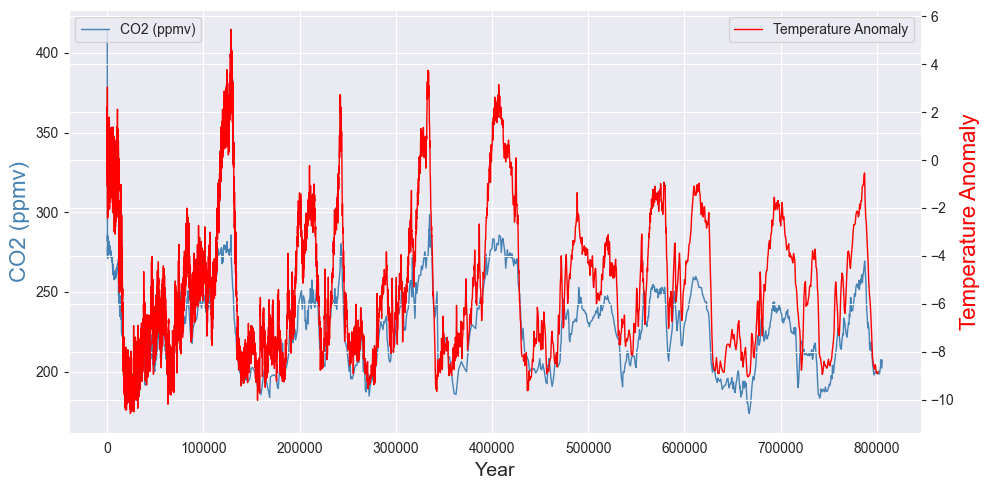

In [1020]:
# Define colors to use
col1 = 'steelblue'
col2 = 'red'

# Define subplots with a larger figure size
fig, ax = plt.subplots(figsize=(10, 5))

# Add the first line to the plot with a thinner line and no markers
ax.plot(co2_df['ECD3_bp'], co2_df['CO2 (ppmv)'], color=col1, linewidth=1, label='CO2 (ppmv)')

# Add x-axis label
ax.set_xlabel('Year', fontsize=14)

# Add y-axis label for the first y-axis
ax.set_ylabel('CO2 (ppmv)', color=col1, fontsize=16)

# Create a legend for the first line
ax.legend(loc='upper left')

# Define the second y-axis that shares the x-axis with the current plot
ax2 = ax.twinx()

# Add the second line to the plot with a thinner line and no markers
ax2.plot(temp_anomality_df['ECD3_bp'], temp_anomality_df['temp_anomality'], color=col2, linewidth=1, label='Temperature Anomaly')

# Add y-axis label for the second y-axis
ax2.set_ylabel('Temperature Anomaly', color=col2, fontsize=16)

# Create a legend for the second line
ax2.legend(loc='upper right')

# Adjust layout to prevent clipping of labels
fig.tight_layout()

# Show the plot
plt.show()

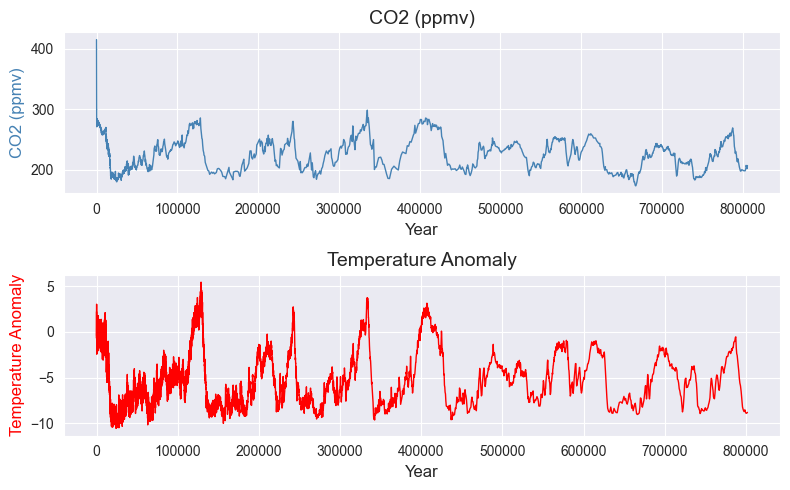

In [1021]:
import matplotlib.pyplot as plt

# Define colors to use
col1 = 'steelblue'
col2 = 'red'

# Define subplots with a 2x1 grid and a smaller figure size
fig, axs = plt.subplots(2, 1, figsize=(8, 5))

# Plot the first line on the first subplot (axs[0])
axs[0].plot(co2_df['ECD3_bp'], co2_df['CO2 (ppmv)'], color=col1, linewidth=1)
axs[0].set_xlabel('Year', fontsize=12)
axs[0].set_ylabel('CO2 (ppmv)', color=col1, fontsize=12)
axs[0].set_title('CO2 (ppmv)', fontsize=14)

# Plot the second line on the second subplot (axs[1])
axs[1].plot(temp_anomality_df['ECD3_bp'], temp_anomality_df['temp_anomality'], color=col2, linewidth=1)
axs[1].set_xlabel('Year', fontsize=12)
axs[1].set_ylabel('Temperature Anomaly', color=col2, fontsize=12)
axs[1].set_title('Temperature Anomaly', fontsize=14)

# Adjust layout to prevent clipping of labels
fig.tight_layout()

# Show the plot
plt.show()

In [1022]:
temp_anomality_df

,Year,ECD3_bp,temp_anomality
0,2022,2.0,2.209957
1,2020,4.0,1.780602
2,2019,5.0,1.887941
3,2018,6.0,0.921894
4,2017,7.0,0.707217
...,...,...,...
5792,-795458,797482.0,-8.730000
5793,-796493,798517.0,-8.540000
5794,-797551,799575.0,-8.880000
5795,-798639,800663.0,-8.920000


# ch4

https://www.methanelevels.org/#sources

In [1023]:
# text to csv - methane  - from 800.000 to 1000 years ago 
epica_domec_800yr_ch4 = pd.read_csv("data\methane\edc-ch4-2008.txt", skiprows=153, sep='\s+')

# remve columns not needed from the df for better clarity 
# https://www.statology.org/pandas-keep-columns/
epica_domec_800yr_ch4 = epica_domec_800yr_ch4[['Gas','Age']]

# rename columns for clarity 
columns_to_rename = ['ECD3_age', 'CH4_ppb']
epica_domec_800yr_ch4.columns = columns_to_rename

# define the current year
current_year = datetime.date.today().year
# add columng age based on year before present equal to 2023 
epica_domec_800yr_ch4['ECD3_bp'] =  current_year - 1950 + epica_domec_800yr_ch4['ECD3_age']
# add a column 'year' to show the year refear about 
epica_domec_800yr_ch4['Year'] = (current_year - (epica_domec_800yr_ch4['ECD3_bp'])).astype(int)
# drop column ECD3_age as redundant 
epica_domec_800yr_ch4 = epica_domec_800yr_ch4.drop(columns='ECD3_age')
# reorder columns in the df 
# https://sparkbyexamples.com/pandas/pandas-change-the-order-of-columns/
epica_domec_800yr_ch4 = epica_domec_800yr_ch4[['Year','ECD3_bp','CH4_ppb']]

In [1024]:
# Checking data shape
# https://stackoverflow.com/questions/58008120/how-to-use-format-in-python-to-print-out-the-data-shape
print("Dataset Shape:")
print(f'Rows {epica_domec_800yr_ch4.shape[0]}, Columns: {epica_domec_800yr_ch4.shape[1]}')

# Checking missing values
# https://medium.com/analytics-vidhya/python-finding-missing-values-in-a-data-frame-3030aaf0e4fd
print("Missing Values")
print(epica_domec_800yr_ch4.isnull().sum(), "\n")

Dataset Shape:
Rows 2103, Columns: 3
Missing Values
Year       0
ECD3_bp    0
CH4_ppb    0
dtype: int64 



from 1000 to 1980 

In [1025]:
ch4_until1980 = pd.read_csv('data\methane\law_ch4.txt', skiprows= 333, nrows=195, sep='\s+')

# remve columns not needed from the df for better clarity 
# https://www.statology.org/pandas-keep-columns/
ch4_until1980 = ch4_until1980[['year','AD']]

# rename columns for clarity 
columns_to_rename = ['Year', 'CH4_ppb']
ch4_until1980.columns = columns_to_rename

# define the current year
current_year = datetime.date.today().year
# add columng age based on year before present equal to 2023 
ch4_until1980['ECD3_bp'] =  current_year - ch4_until1980['Year']
# reorder columns in the df 
# https://sparkbyexamples.com/pandas/pandas-change-the-order-of-columns/
ch4_until1980 = ch4_until1980[['Year','ECD3_bp','CH4_ppb']]

In [1026]:
ch4_until1980

,Year,ECD3_bp,CH4_ppb
0,1010,1014,667.1
1,1015,1009,668.7
2,1020,1004,670.3
3,1025,999,671.8
4,1030,994,673.1
...,...,...,...
190,1960,64,1211.1
191,1965,59,1272.1
192,1970,54,1339.8
193,1975,49,1410.7


In [1027]:
# check for duplicate in the columns ECD3_bp
# https://www.statology.org/pandas-find-duplicates/
duplicate_in_year = ch4_until1980.duplicated(['ECD3_bp'], keep=False)
print(ch4_until1980[duplicate_in_year])

Empty DataFrame
Columns: [Year, ECD3_bp, CH4_ppb]
Index: []


In [1028]:
# Checking data shape
# https://stackoverflow.com/questions/58008120/how-to-use-format-in-python-to-print-out-the-data-shape
print("Dataset Shape:")
print(f'Rows {ch4_until1980.shape[0]}, Columns: {ch4_until1980.shape[1]}')

# Checking missing values
# https://medium.com/analytics-vidhya/python-finding-missing-values-in-a-data-frame-3030aaf0e4fd
print("Missing Values")
print(ch4_until1980.isnull().sum(), "\n")

Dataset Shape:
Rows 195, Columns: 3
Missing Values
Year       0
ECD3_bp    0
CH4_ppb    0
dtype: int64 



In [1029]:
ch4_until1980

,Year,ECD3_bp,CH4_ppb
0,1010,1014,667.1
1,1015,1009,668.7
2,1020,1004,670.3
3,1025,999,671.8
4,1030,994,673.1
...,...,...,...
190,1960,64,1211.1
191,1965,59,1272.1
192,1970,54,1339.8
193,1975,49,1410.7


from 1984 to 2022

In [1030]:
# text to csv - methane  - from 1980 to 2022
noa_ch4_until2022 = pd.read_csv("data\methane\ch4_annmean_gl.txt", 
                                skiprows=46, 
                                sep='\s+',
                                names = ['Year', 'CH4_ppb', 'unc'])


# remve columns not needed from the df for better clarity 
noa_ch4_until2022 = noa_ch4_until2022[['Year', 'CH4_ppb']]

# define the current year
current_year = datetime.date.today().year
# add columng age based on year before present equal to 2023 
noa_ch4_until2022['ECD3_bp'] =  current_year - noa_ch4_until2022['Year']
# reorder columns in the df 
# https://sparkbyexamples.com/pandas/pandas-change-the-order-of-columns/
noa_ch4_until2022 = noa_ch4_until2022[['Year','ECD3_bp','CH4_ppb']]

In [1031]:
noa_ch4_until2022

,Year,ECD3_bp,CH4_ppb
0,1984,40,1644.85
1,1985,39,1657.29
2,1986,38,1670.09
3,1987,37,1682.70
4,1988,36,1693.28
5,1989,35,1704.53
6,1990,34,1714.43
7,1991,33,1724.78
8,1992,32,1735.47
9,1993,31,1736.53


Fuse the 3 dataset toghether based on ECD3_bp

#co2_temp_composite = co2_df.merge(temp_anomality_df, how="outer", on='Year')
temp_anomality_df = pd.concat([noaa_temperature, jouzel_to_append, noa_ch4_until2022], ignore_index=True, axis=0)

In [1032]:
full_ch4 = pd.concat([epica_domec_800yr_ch4,ch4_until1980, noa_ch4_until2022], ignore_index=True, axis=0)
full_ch4 = full_ch4.sort_values(by="ECD3_bp", ascending=False).reset_index(drop=True)

In [1033]:
# Checking data shape
# https://stackoverflow.com/questions/58008120/how-to-use-format-in-python-to-print-out-the-data-shape
print("Dataset Shape:")
print(f'Rows {full_ch4.shape[0]}, Columns: {full_ch4.shape[1]}')

# Checking missing values
# https://medium.com/analytics-vidhya/python-finding-missing-values-in-a-data-frame-3030aaf0e4fd
print("Missing Values")
print(full_ch4.isnull().sum(), "\n")

Dataset Shape:
Rows 2337, Columns: 3
Missing Values
Year       0
ECD3_bp    0
CH4_ppb    0
dtype: int64 



In [1034]:
# check for duplicate in the columns ECD3_bp
# https://www.statology.org/pandas-find-duplicates/
# Check for duplicates in the "ECD3_bp" column
duplicate_in_year = full_ch4['Year'].duplicated(keep=False)

# Print rows with duplicate values in the "ECD3_bp" column
print(full_ch4[duplicate_in_year])

      Year  ECD3_bp  CH4_ppb
2212  1605      419    669.7
2213  1605      419    651.0
2262  1820      204    744.7
2263  1820      204    762.0


In [1035]:
full_ch4 = full_ch4.groupby(['Year','ECD3_bp'])['CH4_ppb'].mean().reset_index()

In [1036]:
full_ch4

,Year,ECD3_bp,CH4_ppb
0,-797446,799470,399.00
1,-796467,798491,458.00
2,-795327,797351,396.00
3,-794370,796394,418.00
4,-792988,795012,428.00
...,...,...,...
2330,2018,6,1857.33
2331,2019,5,1866.58
2332,2020,4,1878.93
2333,2021,3,1895.28


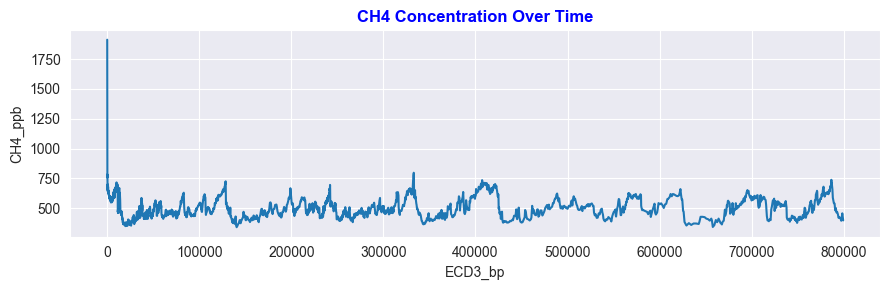

In [1037]:
# plot the CO2 (ppmv) vs ECD3_bp

# Set the style
sns.set_style("darkgrid")

# Set the size of the figure
plt.figure(figsize=(9, 3))

# Create the line plot
sns.lineplot(x='ECD3_bp', y='CH4_ppb', data=full_ch4)

# Add labels and title
plt.xlabel('ECD3_bp')
plt.ylabel('CH4_ppb')
plt.title('CH4 Concentration Over Time', fontweight='bold', color='blue')

# Improve spacing
plt.tight_layout()

# Show the plot
plt.show()

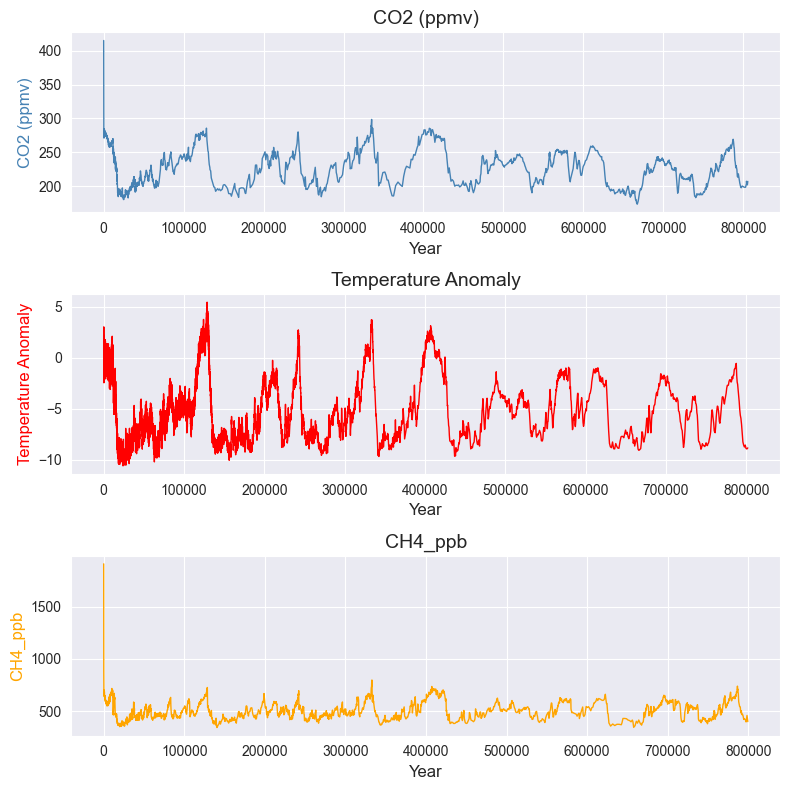

In [1038]:
# Define colors to use
col1 = 'steelblue'
col2 = 'red'
col3 = 'orange'

# Define subplots with a 3x1 grid and a smaller figure size
fig, axs = plt.subplots(3, 1, figsize=(8, 8))

# Plot the first line on the first subplot (axs[0])
axs[0].plot(co2_df['ECD3_bp'], co2_df['CO2 (ppmv)'], color=col1, linewidth=1)
axs[0].set_xlabel('Year', fontsize=12)
axs[0].set_ylabel('CO2 (ppmv)', color=col1, fontsize=12)
axs[0].set_title('CO2 (ppmv)', fontsize=14)

# Plot the second line on the second subplot (axs[1])
axs[1].plot(temp_anomality_df['ECD3_bp'], temp_anomality_df['temp_anomality'], color=col2, linewidth=1)
axs[1].set_xlabel('Year', fontsize=12)
axs[1].set_ylabel('Temperature Anomaly', color=col2, fontsize=12)
axs[1].set_title('Temperature Anomaly', fontsize=14)

# Plot the third line on the third subplot (axs[2])
axs[2].plot(full_ch4['ECD3_bp'], full_ch4['CH4_ppb'], color=col3, linewidth=1)  # Change 'Column_X' to the desired column
axs[2].set_xlabel('Year', fontsize=12)
axs[2].set_ylabel('CH4_ppb', color=col3, fontsize=12)  # Change 'Column_X Label' to the desired label
axs[2].set_title('CH4_ppb', fontsize=14)  # Change 'Column_X Title' to the desired title

# Adjust layout to prevent clipping of labels
fig.tight_layout()

# Show the plot
plt.show()

# fuse the dataset 

The porpuse of this section is

In [1039]:
# group the co2_df dataset based on year to remove duplicate 
co2_df_to_merge = co2_df.groupby('Year')['CO2 (ppmv)'].mean().reset_index()
# group the temp_anomality_df dataset based on year to remove duplicate 
temp_anomality_df_to_merge = temp_anomality_df.groupby('Year')['temp_anomality'].mean().reset_index()
# group the temp_anomality_df dataset based on year to remove duplicate 
full_ch4_to_merge = full_ch4.groupby('Year')['CH4_ppb'].mean().reset_index()

In [1040]:
temp_anomality_df_to_merge

,Year,temp_anomality
0,-799712,-8.820000
1,-798639,-8.920000
2,-797551,-8.880000
3,-796493,-8.540000
4,-795458,-8.730000
...,...,...
5792,2017,0.707217
5793,2018,0.921894
5794,2019,1.887941
5795,2020,1.780602


In [1041]:
# merge the dataframe on columns years 
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html

# Merge temp df with co2 dataframe
temp_co2_df = temp_anomality_df_to_merge.merge(co2_df_to_merge, how='outer', on='Year').reset_index(drop=True)

# Merge temp_co2_df with ch4 df
temp_co2_ch4_df = temp_co2_df.merge(full_ch4_to_merge, how='outer', on='Year').reset_index(drop=True)

# Order df by years in descending order
temp_co2_ch4_df = temp_co2_ch4_df.sort_values('Year', ascending=False).reset_index(drop=True)

In [1042]:
temp_co2_ch4_df.head(100)


,Year,temp_anomality,CO2 (ppmv),CH4_ppb
0,2022,2.209957,414.813239,1911.83
1,2021,NaN,412.712066,1895.28
2,2020,1.780602,410.531603,1878.93
3,2019,1.887941,407.994337,1866.58
4,2018,0.921894,405.090357,1857.33
...,...,...,...,...
95,1911,0.880000,298.106247,NaN
96,1910,NaN,297.869107,903.10
97,1909,NaN,301.504135,NaN
98,1906,NaN,298.659559,NaN


In [1043]:
# Interpolate NaN values using 'time' method
temp_co2_ch4_df.interpolate(method='linear', inplace=True)

# Reset the index if needed
temp_co2_ch4_df.reset_index(drop=True)

# Create a column ECD3_br to represent the year before present 
# define the current year
current_year = datetime.date.today().year

# add columng age based on year before present equal to 2023 
temp_co2_ch4_df['ECD3_bp'] =  current_year- temp_co2_ch4_df['Year']

#reorder columns 
temp_co2_ch4_df.reindex(columns=['Year',	'ECD3_bp', 'temp_anomality',	'CO2 (ppmv)',	'CH4_ppb'])

,Year,ECD3_bp,temp_anomality,CO2 (ppmv),CH4_ppb
0,2022,2,2.209957,414.813239,1911.83
1,2021,3,1.995280,412.712066,1895.28
2,2020,4,1.780602,410.531603,1878.93
3,2019,5,1.887941,407.994337,1866.58
4,2018,6,0.921894,405.090357,1857.33
...,...,...,...,...,...
9797,-801975,803999,-8.820000,202.921723,399.00
9798,-802059,804083,-8.820000,207.498645,399.00
9799,-802572,804596,-8.820000,204.861938,399.00
9800,-803182,805206,-8.820000,202.226839,399.00


In [1044]:
temp_co2_ch4_df.to_csv('temp_co2_ch4_df.csv')

PermissionError: [Errno 13] Permission denied: 'temp_co2_ch4_df.csv'

In [ ]:
# Define colors to use
col1 = 'steelblue'
col2 = 'red'
col3 = 'orange'

# Define subplots with a 3x1 grid and a smaller figure size
fig, axs = plt.subplots(3, 1, figsize=(8, 8))

# Plot the first line on the first subplot (axs[0])
axs[0].plot(temp_co2_ch4_df['ECD3_bp'], temp_co2_ch4_df['CO2 (ppmv)'], color=col1, linewidth=1)
axs[0].set_xlabel('Year', fontsize=12)
axs[0].set_ylabel('CO2 (ppmv)', color=col1, fontsize=12)
axs[0].set_title('CO2 (ppmv)', fontsize=14)

# Plot the second line on the second subplot (axs[1])
axs[1].plot(temp_co2_ch4_df['ECD3_bp'], temp_co2_ch4_df['temp_anomality'], color=col2, linewidth=1)
axs[1].set_xlabel('Year', fontsize=12)
axs[1].set_ylabel('Temperature Anomaly', color=col2, fontsize=12)
axs[1].set_title('Temperature Anomaly', fontsize=14)

# Plot the third line on the third subplot (axs[2])
axs[2].plot(temp_co2_ch4_df['ECD3_bp'], temp_co2_ch4_df['CH4_ppb'], color=col3, linewidth=1)  # Change 'Column_X' to the desired column
axs[2].set_xlabel('Year', fontsize=12)
axs[2].set_ylabel('CH4_ppb', color=col3, fontsize=12)  # Change 'Column_X Label' to the desired label
axs[2].set_title('CH4_ppb', fontsize=14)  # Change 'Column_X Title' to the desired title

# Adjust layout to prevent clipping of labels
fig.tight_layout()

# Show the plot
plt.show()

# prediction 

https://datascience.stackexchange.com/questions/50829/predicting-yearly-income-with-linear-regression-using-python
https://www.nickmccullum.com/python-machine-learning/linear-regression-python/
https://www.analyticsvidhya.com/blog/2021/10/everything-you-need-to-know-about-linear-regression/
https://www.analyticsvidhya.com/blog/2022/06/time-series-forecasting-using-python/

In [ ]:
#import nasa dataset for consistency and affiidability of the prevision of modern era estimation 
# https://climate.nasa.gov/vital-signs/global-temperature/
# https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt
# https://www.temperaturerecord.org/#sources

nasa_temp_anom_until_1880 = pd.read_csv('data\\Temperature\\nasa_until1880.txt', skiprows=3, sep='\s+', )
# drop first row 
# https://stackoverflow.com/questions/43136137/drop-a-specific-row-in-pandas
nasa_temp_anom_until_1880 = nasa_temp_anom_until_1880.drop(0).reset_index(drop=True)
# keep only relevant columns 
nasa_temp_anom_until_1880 = nasa_temp_anom_until_1880[['Year','No_Smoothing']] 
# rename columns
nasa_temp_anom_until_1880.columns=['Year','temp_anomaly']
nasa_temp_anom_until_1880['Year']=nasa_temp_anom_until_1880['Year'].astype(int)

nasa_temp_anom_until_1880



In [ ]:
# plot the CO2 (ppmv) vs Gasage (yr BP)

# Set the size of the figure
plt.figure(figsize=(9, 5))

# Create the scatter plot with a regression line
# https://stackoverflow.com/questions/53257382/what-do-scatter-kws-and-line-kws-do-in-seaborn-lmplot
sns.regplot(x='Year', y='temp_anomaly', data=nasa_temp_anom_until_1880, scatter_kws={'s': 10}, label='Original Data', line_kws={'color': 'green'})


plt.xlabel('Year')
plt.ylabel('Temp anomaly')
plt.title('Temperature Anomaly Over Time', fontweight='bold', color='blue')
plt.legend()

# Improve spacing
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt

# Assuming 'Year' and 'temp_anomaly' are the correct column names in your DataFrame
x = nasa_temp_anom_until_1880[['Year']]
y = nasa_temp_anom_until_1880['temp_anomaly']  # Removed extra brackets around 'temp_anomaly'

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=42)

# Create a linear regression model and fit it to the training data
model = LinearRegression()
model.fit(x_train, y_train)

# Make predictions on the test set
predictions = model.predict(x_test)

# Evaluate the regression model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, predictions, squared=False))





In [ ]:
# Create a DataFrame for future predictions
future_predictions_df = pd.DataFrame({
    'Year': future_years.flatten(),
    'Predicted_Temp_Anomaly': predictions_future
})

future_predictions_df['Year'] = future_predictions_df['Year'].astype(int)



In [ ]:

# Set the size of the figure
plt.figure(figsize=(9, 5))

# Create the scatter plot for historical data without a regression line
sns.scatterplot(x='Year', y='temp_anomaly', data=nasa_temp_anom_until_1880, label='Original Data')

# Create a line plot for predicted data
sns.lineplot(x='Year', y='Predicted_Temp_Anomaly', data=future_predictions_df, label='Predicted Data', color='red')

plt.xlabel('Year')
plt.ylabel('Temp anomaly')
plt.title('Temperature Anomaly Over Time - prediction until 2060', fontweight='bold', color='blue')
plt.legend()

# Improve spacing
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
#from scipy.stats import pearsonr
x
# Interpolate CO2 values to match the length of temp_anomality_df
#co2_interpolated = np.interp(temp_anomality_df['ECD3_bp'], co2_df['ECD3_bp'], co2_df['CO2 (ppmv)'])

# Use temp_anomality_df directly for temp_anomality values
#temp_values = temp_anomality_df['temp_anomality'].values

#correlation_coefficient, p_value = pearsonr(co2_interpolated, temp_values)

#print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
#print(f"P-value: {p_value}")

In [ ]:
# merge co2 and temperature dataset 
# group the co2_df dataset based on year to remove duplicate 
#co2_df = co2_df.groupby('Year')['CO2 (ppmv)'].mean().reset_index()
# group the temp_anomality_df dataset based on year to remove duplicate 
#temp_anomality_df = temp_anomality_df.groupby('Year')['temp_anomality'].mean().reset_index()

In [ ]:
# merge the co2 and temp dataset on "Year" performing a full join. This will create multiple nan
#co2_temp_composite = co2_df.merge(temp_anomality_df, how="outer", on='Year')
# recreate the column ECD3_bp for clarity
#co2_temp_composite['ECD3_bp'] = current_year - co2_temp_composite['Year']
# reorder columns
#co2_temp_composite = co2_temp_composite[['Year', 'ECD3_bp',	'CO2 (ppmv)', 'temp_anomality']]
# sort by year 
#co2_temp_composite = co2_temp_composite.sort_values('Year', ascending=False).reset_index(drop=True)